# Code for plots

## Plot of the error by varying the input dimension

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
depth=5
W=512
input_dims=[5,10,20,40,100,784,30]

In [19]:
x_array=np.load(f'./arrays/sizes_{depth}_layer_{W}_inputdim_{input_dims[0]}.npy')
y_arrays=[]
for i in range(len(input_dims)):
    y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dims[i]}.npy'))
    

Text(0, 0.5, 'error-error_inf')

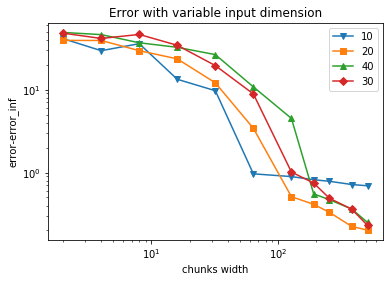

In [21]:
fig = plt.figure()
ax = plt.gca()
#ax.plot(x_array,y_arrays[0],marker="o",label="5")
ax.plot(x_array,y_arrays[1],marker="v",label="10")
ax.plot(x_array,y_arrays[2],marker="s",label="20")
ax.plot(x_array,y_arrays[3],marker="^",label="40")
#ax.plot(x_array,y_arrays[4],marker="p",label="100")
#ax.plot(x_array,y_arrays[5],marker="D",label="784")
ax.plot(x_array,y_arrays[6],marker="D",label="30")
ax.set_title('Error with variable input dimension')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('error-error_inf')

## Plot the error by varying the depth

In [ ]:
x_arrays=[]
y_arrays=[]
x_arrays.append(np.load(f'./arrays/sizes_{2}_layer_{2048}_inputdim_{784}.npy')) 
x_arrays.append(np.load(f'./arrays/sizes_{3}_layer_{1024}_inputdim_{784}.npy')) 
x_arrays.append(np.load(f'./arrays/sizes_{4}_layer_{512}_inputdim_{784}.npy')) 
x_arrays.append(np.load(f'./arrays/sizes_{5}_layer_{512}_inputdim_{784}.npy')) 
y_arrays.append(np.load(f'./arrays/error_{2}_layer_{2048}_inputdim_{784}.npy')) 
y_arrays.append(np.load(f'./arrays/error_{3}_layer_{1024}_inputdim_{784}.npy')) 
y_arrays.append(np.load(f'./arrays/error_{4}_layer_{512}_inputdim_{784}.npy')) 
y_arrays.append(np.load(f'./arrays/error_{5}_layer_{512}_inputdim_{784}.npy')) 

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.plot(x_array,y_arrays[0],marker="o",label="2")
ax.plot(x_array,y_arrays[1],marker="v",label="3")
ax.plot(x_array,y_arrays[2],marker="s",label="4")
ax.plot(x_array,y_arrays[3],marker="^",label="5")
ax.set_title('Error with variable network depths')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('error-error_inf')